# HOME WORK 6

## PROBLEM STATEMENT

Regularization methods are a key tool in the solution of inverse problems. They are used to introduce prior knowledge and make the approximation of ill-posed (pseudo-)inverses feasible. In the last two decades interest has shifted from linear towards nonlinear regularization methods even for linear inverse problems.

## TASK 1:

Investigate the effect of regularisation on the solution of the following inverse problem. The 
vector m is 40-dimensional. Four measurements related to m have been made.

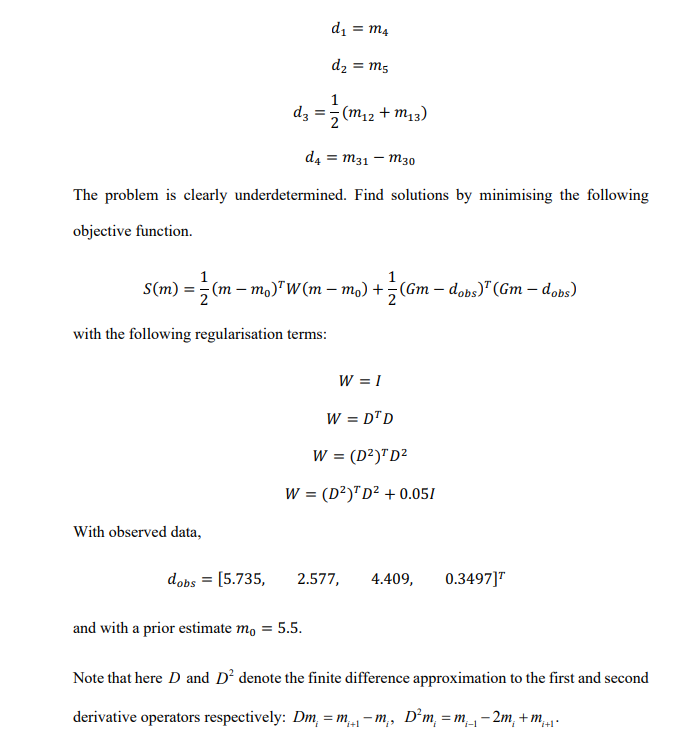

In [30]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [31]:
#Initial data:

#Observation matrix

G = np.zeros([4,40])

#Prior estimate vector:
m0 = 5.5 * np.ones((40,1), dtype='single')

#Measured data:
dobs = np.array([[5.735], [2.577], [4.409], [0.3497]])

#Identity matrix
I = np.eye(40, dtype=int)

#First operator of derivative
Df = np.ones(40) * -1
Df = np.diag(Df)
for i in range(0, 39):
    Df[i, i+1] = 1
    
#Second operator of derivative 
Ds = np.ones(40) * -2
Ds = np.diag(Ds)
for i in range(0, 39):
    Ds[i, i+1] = 1
    Ds[i, i-1] = 1
    Ds[0, 0] = -1
    Ds[0, 39] = 0
    Ds[39, 38] = 1
    Ds[39, 39] = -1
    
#Difinition of the coefficients of an observation matrix
G[0][3] = 1
G[1][4] = 1
G[3][30]= 1
G[3][29]= -1
G[2][11]= 0
G[2][12]= 0.5

### a) Case 1:

<br>
$$W = I $$

In [32]:
Sa = m0 + np.linalg.inv(I.dot(I) + G.T.dot(G)).dot(G.T).dot(dobs - G.dot(m0))

### b) Case 2 :


$$W = D^TD$$

In [33]:
Sb = m0 + np.linalg.inv(np.dot(Df.T, Df).dot(I) + G.T.dot(G)).dot(G.T).dot(dobs - G.dot(m0))

### c) Case 3:

$$W = (D^2)^TD^2$$


In [34]:
Sc = m0 + np.linalg.inv(np.dot(Ds.T, Ds).dot(I) + G.T.dot(G)).dot(G.T).dot(dobs - G.dot(m0))

### d) Case 4:

$$W = (D^2)^TD^2 + 0.05I$$


In [35]:
Sd = m0 + np.linalg.inv((np.dot(Ds.T, Ds) + 0.05 * I).dot(I) + G.T.dot(G)).dot(G.T).dot(dobs - G.dot(m0))

### e) Visualization of Results:

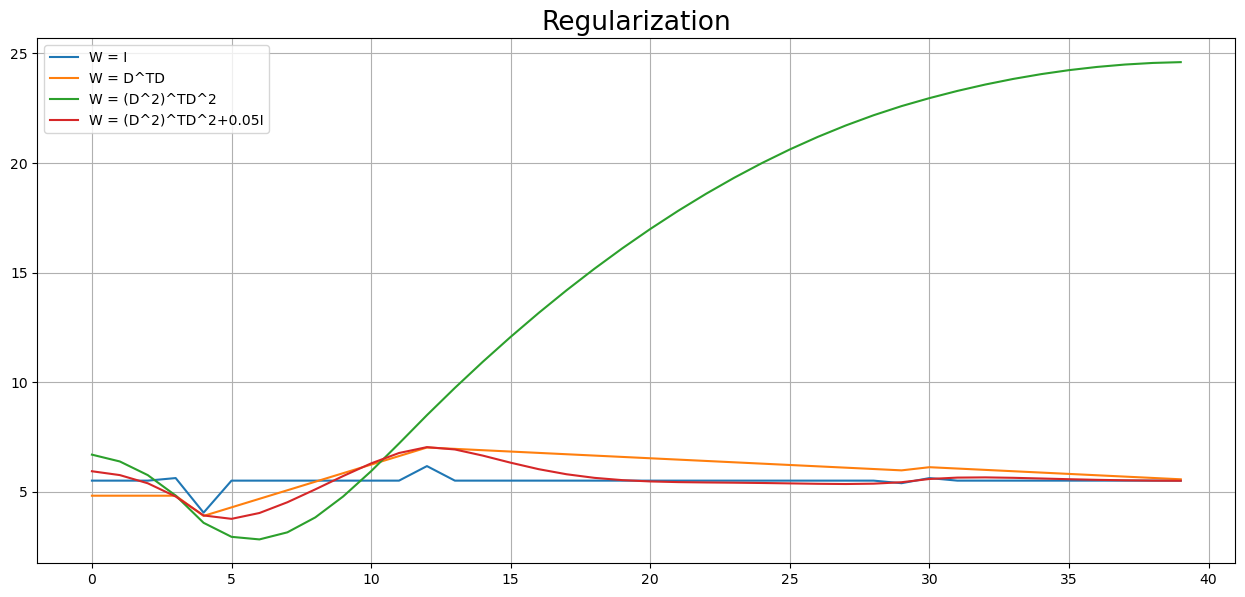

In [36]:
plt.figure(figsize = (34,15))
plt.subplot(221)
plt.title('Regularization', fontsize = 19)
plt.plot(range(0, 40, 1), Sa, label = 'W = I')
plt.plot(range(0, 40, 1), Sb, label = 'W = D^TD')
plt.plot(range(0, 40, 1), Sc, label = 'W = (D^2)^TD^2')
plt.plot(range(0, 40, 1), Sd, label = 'W = (D^2)^TD^2+0.05I')

plt.legend()
plt.grid()

## TASK 2:
Let a point be picked at random (uniform density) in the unit square. Compute the probability that it is in the triangle bounded by $𝑥=0$, $𝑦=0$, and $𝑥+𝑦=1$. Recompute the probability if $𝑓𝑋(𝑥)=2𝑥$ and $𝑓𝑌(𝑦)=2(1−𝑦)$ and $𝑥$ and $𝑦$ are independent random variables.

### a) Case 1: Probability that it is in the triangle bounded by $𝑥=0$, $𝑦=0$, and $𝑥+𝑦=1$:

$$P(X,Y) = \int\int_{D} f(x,y)dxdy = \int\int_{D} f(x)f(y)dxdy = \int_{0}^{1}\int_{0}^{x} f(x)f(y)dxdy = \int_{0}^{1} xdx = 0.5
$$

### b) Case 2: Probability if $𝑓𝑋(𝑥)=2𝑥$ and $𝑓𝑌(𝑦)=2(1−𝑦):


$$P(X,Y) = \int\int_{D} f(x,y)dxdy = \int\int_{D} f(x)f(y)dxdy = \int_{0}^{1}\int_{0}^{1-x} 2x\cdot2(1-y)dxdy = 0.5
$$

## TASK 3:
For the following two examples, compute the expectations of $𝑋$, $𝑌$ and $𝐸[𝑋𝑌]$. Compute the covariance of $𝑋$ and $𝑌$. Are the two variables correlated? Are the two variables independent? For both cases, what is the conditional probability that $𝑥=1$ given that $𝑦=1$?<br>



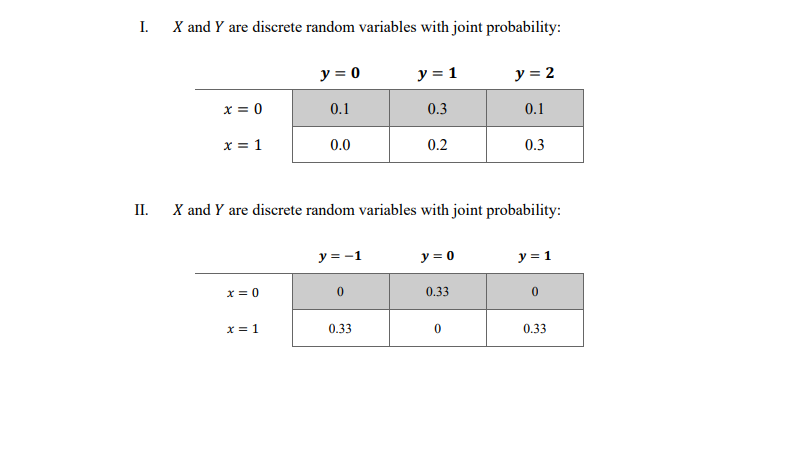

### a) Expactations $E(X)$, $E(Y)$ and $E(XY)$:


### Case 1:

$$
E(X)_{case1} = 0 \cdot (0.1 + 0.3 + 0.1) + 1 \cdot (0.0 + 0.2 + 0.3) = 0.5
$$

$$
E(Y)_{case1} = 0 \cdot (0.1 + 0.0) + 1 \cdot (0.3 + 0.2) + 2 \cdot (0.1 + 0.3) = 1.3
$$

### Case 2:

$$
E(XY)_{case1} = 1 \cdot 0.2 + 2 \cdot 0.3 = 0.8
$$

$$
E(X)_{case2} = 0 \cdot (0.00 + 0.33 + 0.00) + 1 \cdot (0.33 + 0.00 + 0.33) = 0.66
$$

$$
E(Y)_{case2} = -1 \cdot (0.00 + 0.33) + 0 \cdot (0.33 + 0.00) + 1 \cdot (0.00 + 0.33) = 0.00
$$

$$
E(XY)_{case2} = -1 \cdot 0.33 + 1 \cdot 0.33 = 0.00
$$

### b) Covariance of $X$ and $Y$, Correlation and Dependency:

### Case 1:

$$
Cov(X,Y)_{case1} = 0.8 - 0.5 \cdot 1.3 = 0.15
$$

Variables are correlated because$$
E(XY)_{case1}\neq E(X)_{case1}E(Y)_{case1}
$$

Variables are dependent because

$$P(X = 0, Y = 0)_{case1} \neq P(X = 0)_{case1}P(Y = 0)_{case1}$$

### Case 2:

$$
Cov(X,Y)_{case2} = 0.00 - 0.00 \cdot 0.66 = 0.00
$$

Variables are uncorrelated because$$
E(XY)_{case2}=E(X)_{case2}E(Y)_{case2}
$$

Variables are dependent because

$$P(X = 0, Y = 0)_{case2} \neq P(X = 0)_{case2}P(Y = 0)_{case2}$$

### c) Conditional probability that  $𝑥=1$  given that  $𝑦=1$:


$$
P_{X|Y}(x_{i}|y_{i})=P(X=x_i|Y=y_j) = \frac{P(X=x_i,Y=y_j)}{P(Y=y_j)}
$$

$$
P(X=1|Y=1)_{case1} = \frac{0.2}{0.3+0.2} = 0.4
$$

$$
P(X=1|Y=1)_{case2} = \frac{0.33}{0.33} = 1
$$

## REFERENCES

1) https://medium.com/mlearning-ai/what-is-the-bayes-theorem-545a2ef0b91c

2) https://medium.com/analytics-vidhya/bayes-rule-4026a1a27f34

3) Lecture 14